# Zombie apokalypse
*Av Anna og Mulan*

Vi befinner oss i en postapokalyptisk situasjon der verden har blitt utsatt for et virus som gjør mennesker om til zombier.  Viruset smitter kun via blod, f.eks. ved bitt eller kloring fra zombier. 

Vi skal studere en avsideliggende landsby, Alexandria, som ligger i nærheten av Washington D.C., og som etter et zombie-utbrudd har blitt et tilfluktssted for 500 mennesker. De har tilgang til en del mat og våpen, og de har en mur rundt hele landsbyen som holder zombiene unna. Men de må også ut for å finne nye ressurser og andre mennesker som trenger hjelp, så de er aldri helt trygge.

### Modell 1: *Vekst*
La oss først se på populasjonsveksten dersom menneskene er helt trygge. 
Om populasjonen økes av en vekstrate av nye fødsler hver dag, vil Eulers metode gi en formel for populasjonen som er lik populasjonen dagen før multiplisert med vekstraten

$$ N_{n} = N_{n-1} + F \cdot N_{n-1} $$

Der hvor F er vekstraten av populasjonen, altså fødselsraten.

Og hvis det vandrer inn flere personer hver dag, vil den totale populasjonen per dag være lik

$$ N_{n} = N_{n-1} + F \cdot N_{n-1} + I $$

Der hvor I er gjenommsnittet av antall innvandrere hver dag

Populasjonen vil dermed også økes eksponentielt.

mennesker: 20751139


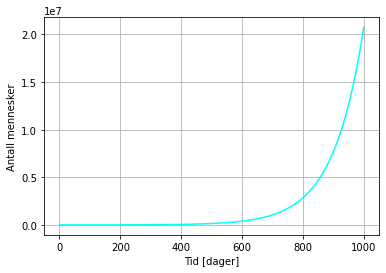

In [309]:
from pylab import *

# Konstanter
N = 500               # Antall mennesker på starten
F = 0.01              # fødselsrate per dag
I = 5                 # gjennomsnittlig innvandrere per dag
tid_start = 1         # Dagen etter apokalypsen
tid_slutt = 1000      # Dager etter apokalypsen

# Lister
Tid = range(tid_slutt)
Mnsk = [500]

# Eulers metode
for i in range (tid_start, tid_slutt):
    N += F * N + I # Antall mennesker avhengig av babyer født og innvandring
    Mnsk.append(N)

print("mennesker:",round(N))

plot(Tid, Mnsk, 'cyan')
ylabel("Antall mennesker")
xlabel("Tid [dager]")
grid()
show()

### Modell 2: *Bæreevne*
Populasjonsveksten vil da bare være påvirket av fødsel av barn og innvandrere. 

Men siden de ikke har uuttømmelige resurser og plass, vil populasjonsveksten bli redusert av den totale bæreevnen B, selv om menneskene i landsbyen dyrker egen mat, men maten vil bare være nok til den totale bæreevnen.

$$ N_{n} = N_{n-1} + (F \cdot N_{n-1}) \cdot (1 - \frac{N_{n-1}}{B}) + I $$

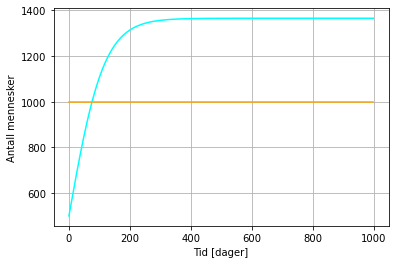

Mennesker:  1366


In [310]:
# resette antall mennesker
N = 500          
Mnsk = [500]

# Bæreevne
b = 1000
Bnsk = b + zeros(tid_slutt)

for i in range (tid_start, tid_slutt):
    N += F * N *(1-N/b) + I
    Mnsk.append(N)

plot(Tid, Mnsk, 'cyan', Bnsk, 'orange')
ylabel("Antall mennesker")
xlabel("Tid [dager]")
grid()
show()

print("Mennesker: ",round(N))

### Modell 3: *Dødsrate*
Det vil også være folk som dør naturlig, dermed innfører vi en dødsrate

$$ N_{n} = N_{n-1} + F \cdot N_{n-1} \cdot (1 - \frac{N_{n-1}}{B}) - D \cdot N_{n-1} + I $$

Der hvor D er dødsraten for naturlige døder som død av sykdom, skade eller alderdom.
Dødsraten vil også være høyere enn vanlig, grunnet lite tilgang på medesiner og andre livsviktige legemidler.

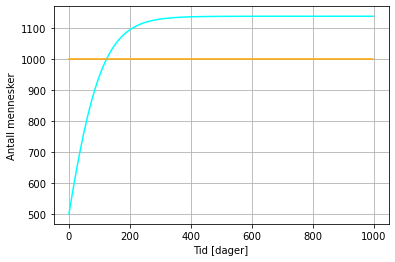

Mennesker: 1139


In [311]:
# resette antall mennesker
N = 500
Mnsk = [500]

# Dødsrate
D = 0.003

for i in range (tid_start, tid_slutt):
    N += N * F *(1-N/b) - N*D + I
    Mnsk.append(N)

plot(Tid, Mnsk, 'cyan', Bnsk, 'orange')
ylabel("Antall mennesker")
xlabel("Tid [dager]")
grid()
show()

print("Mennesker:",round(N))

### Modell 4: *Zombier*
OMG! Etter noen dager begynner ressursene i byen å gå tom, siden den totale populasjonen er over bæreevnen. Derfor blir de overflødige mennene og damene sendt ut av landsbyen for å lete etter nye ressurser. 

En dag oppdaget Digent-M at vennen sin ikke kom tilbake, og flere gjorde det samme. Etterhvert oppdager man også en zombie-camp på utsiden av Alexandria. Det er nemlig zombier der ute som har sultet litt lenge, og spiser opp hele mennesket nå som de har kommet ut. Dermed blir det ingen infeksjoner og antall zombier vil ikke vokse.

Menneske populasjonsraten vil da bli påvirket av zombiene, og sannsynligheten av at et menneske går ut for å finne resursser og blir drept av en zombie.

$$ N_{n} = N_{n-1} + F \cdot N_{n-1} \cdot (1 - \frac{N_{n-1}}{B}) - D \cdot N_{n-1} - (N_{n-1}-B) \cdot d + I $$

Der hvor d er tettheten av zombier i området $ \frac{Z}{A} $, der Z er antall zombier og A er arealet rundt. d vil da også sannsynligheten får å møte en zombie og bli drept.

$$ N_{n} = N_{n-1} + F \cdot N_{n-1} \cdot (1 - \frac{N_{n-1}}{B}) - D \cdot N_{n-1} - (N_{n-1}-B) \cdot \frac{Z}{A} + I $$

Zombiene er udødelige og spiser bare mennesker, derfor har den ingen dødsrate eller vekstrate, siden de spiser opp hele mennesket, og kan dermed ikke reprodusere seg.

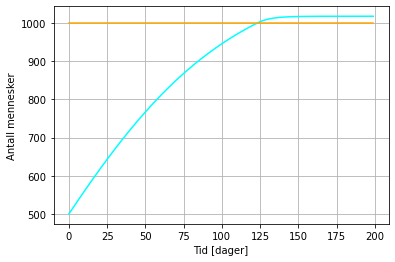

Mennesker: 1018


In [308]:
# resette antall mennesker
N = 500
Mnsk = [500]

# Zombier
Z = 100           # Antall zombier funnet
A = 1000          # Arealet rundt [m^2]

def mote(menneske, baereevne, zombie, area):    # sannsynlighet for at et menneske møter en zombie
    if menneske<baereevne:
        return 0
    elif zombie<area:
        return (menneske - baereevne) * zombie/area
    else:
        return (menneske - baereevne)

for i in range (tid_start, tid_slutt):
    N += N*F *(1-N/b) - N*D - mote(N, b, Z, A) + I
    Mnsk.append(N)

plot(Tid, Mnsk, 'cyan', Bnsk, 'orange')
ylabel("Antall mennesker")
xlabel("Tid [dager]")
grid()
show()

print("Mennesker:",round(N))

### Modell 5: *infeksjon*
Plutselig en dag merker folka i landsbyen at zombiene utenfor har blitt flere, men de visste ikke hvordan helt til Digent-M observerte at zombiene ikke lenger spiste opp hele mennesket, men isteden infiserte vanlige mennesker om til zombier ved kloring/biting.

Dermed måttes modellen justeres. Zombiene vil nå multiplisere seg ved den sannsynligheten om at de biter/klør et menneske de kommer i kontakt med isteden for å spise det opp.

Det vil si at zombier nå får en reproduksjonsrate og blir gitt ved

$$ Z_{n} = Z_{n-1} + m $$

Der m er antall nye zombier. m vil da være de menneskene som møter en zombie, men ikke blir spist opp. Det vil si at

$$ m  = (N_{n-1}-B) \cdot \frac{Z_{n-1}}{A} \cdot i $$

Der hvor $ (N_{n-1}-B) \cdot \frac{Z}{A} $ er de menneskene som går ut og møter en zombie, i er sannsynligheten for at en zombie klør/biter et menneske isteden for å spise det opp

Det vil si at den totale antall zombier blir gitt ved

$$ Z_{n} = Z_{n-1} + (N_{n-1}-B) \cdot \frac{Z_{n-1}}{A} \cdot i $$

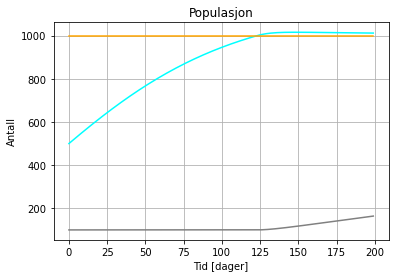

In [393]:
# resette antall mennesker
N = 500
Mnsk = [500]
Z = 100

# zoome inn på et bestemt tidsrom
tid_slutt = 200
Tid = range(tid_slutt)

# redefinere Bæreevne
Bnsk = b + zeros(tid_slutt)

# Konstanter
inf = 0.5         # sannsynlighet for at zombie infiserer et menneske

# Lister
Zom = [100]

for i in range (tid_start, tid_slutt):
    N += N*F *(1-N/b) - N*D - mote(N, b, Z, A) + I
    if N>b:
        Z += mote(N, b, Z, A)*inf
    Mnsk.append(N)
    Zom.append(Z)

plot(Tid, Mnsk, 'cyan', Zom, 'grey', Bnsk, 'orange')
title('Populasjon')
ylabel("Antall")
xlabel("Tid [dager]")
grid()
show()

### Modell 6: *Død av zombier*
Situasjonen ble bare verre og verre. Digent-M måtte se på en og en av vennene sine miste livet eller bli om til zombier. Håpet var nesten ute, og zombiene ble bare flere...helt til en person som levde i en bobil ved siden av landsbyen viste seg. Han introduserte seg som Crazy-Dave og sa at han var naboen til landsbyfolka. Bobilen hans, Penny, hadde genemodifisert planter slik at de kunne skyte ned zombiene. De resterende folka ble fylt av håp og begynte å plante disse plantene.

Folk planter 3 planter hver dag, og hver plante har en sannsynlighet på 15% for å drepe en zombie, og en zombie har 85% sjanse for å spise opp en plante. Det vil si at antall planter blir gitt ved.

$$ P_{n} = P_{n-1} + 3 - \frac{P_{n-1}}{A} \cdot Z_{n-1} \cdot (1-p) $$

Hvis man planter en plante per m^2, og $ \frac{P_{n-1}}{A} $ er sannsynligheten for at en plante og en zombie møtes, og $ \frac{P_{n-1}}{A} \cdot Z_{n-1} $ er antall møter mellom plantene og zombiene. p er sannsynligheten for at en zombie blir drept av en plante.

Dette vil si at zombiene nå blir påvirket av en dødsrate også.

$$ Z_{n} = Z_{n-1} + (N_{n-1}-B) \cdot \frac{Z_{n-1}}{A} \cdot inf - \frac{P_{n-1}}{A} \cdot Z_{n-1} \cdot p $$

Der $ D_z $ er $ \frac{P_{n-1}}{A} \cdot Z_{n-1} $ er antall møter, og p er dreperaten. Dermed vil $ \frac{P_{n-1}}{A} \cdot Z_{n-1} \cdot p $ være dødsraten til zombiene.

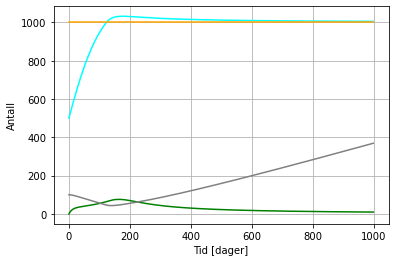

In [395]:
# reset
N = 500
Mnsk = [500]
Z = 100
Zom = [100]

# sette tiden tilbake
tid_slutt = 1000
Tid = range(tid_slutt)

# redefinere Bæreevne
Bnsk = b + zeros(tid_slutt)


# Planter
P = 0           # antall planter
p = 0.15        # sannsynligheten for at en plante dreper en zombie
Plnt = [0]

# Populasjon
for i in range (tid_start, tid_slutt):
    N += N*F *(1-N/b) - N*D - mote(N, b, Z, A) + I
    pz = P/A * Z # Anntall møter mellom plater og zombier
    P += 3 - pz * (1-p)
    Z += mote(N, b, Z, A)*inf - pz * p
    Mnsk.append(N)
    Zom.append(Z)
    Plnt.append(P)

plot(Tid, Mnsk, 'cyan', Bnsk, 'orange', Plnt, 'green')
plot(Tid, Zom, 'grey')
ylabel("Antall")
xlabel("Tid [dager]")
grid()
show()

### Modell 7: *ressurser*
Menneskene i landsbyen har endelig funnet håp, men zombiene fortsetter å øke i en skremmende fart, mens plantene nesten er utryddet i fohold til zombiene. Det var i denne tiden Digent-M fikk kontakt med landsbyene Hilltop og Kingdom, som var villige til å samarbeide mot zombiene. 

Hilltop var villige til å gi Alexsandria nærigsmidler (plantfood) til plantene slik at raten for at plantene dreper zombiene økes. Mens Kingdom ga ekstra resursser til menneskene der, noe som øker bæreevnen.

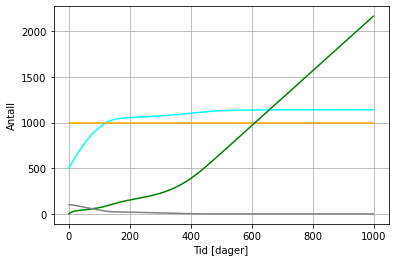

In [392]:
# reset
N = 500
Mnsk = [500]
Z = 100
Zom = [100]
P = 0       

# Planter
H = 0.05        # hjelp fra Hilltop (plantfood)
p = 0.15 + H    # sannsynligheten for at en plante dreper en zombie

Plnt = [0]

# Populasjon
for i in range (tid_start, tid_slutt):
    N += N*F *(1-N/b) - N*D - mote(N, b, Z, A) + I
    pz = P/A * Z # Anntall møter mellom plater og zombier
    P += 3 - pz * (1-p)
    Z += mote(N, b, Z, A)*inf - pz * p
    Mnsk.append(N)
    Zom.append(Z)
    Plnt.append(P)

plot(Tid, Mnsk, 'cyan', Bnsk, 'orange', Plnt, 'green')
plot(Tid, Zom, 'grey')
ylabel("Antall")
xlabel("Tid [dager]")
grid()
show()

## Drøfting av modellene

### Modell 1: *Vekst*
Modellen sier at populasjonen ved neste tidssteg er lik antall mennesker ved forrige tidssteg + barn som blir født og det gjennomsnittlige antallet innvandrere til landsbyen.

Det er ingen faktorer som hindrer veksten i modellen, det vil si at folk har uendelig med resursser og trenger derfor ikke å dra ut av landsbymurene, og at ingen dør. Derfor er veksten eksponetiel og populasjonen vil skyte til værs. Modellen er urealistisk, siden det alltid er mennesker som dør og ressurser er begrenset. 

### Modell 2: *Bæreevne*
Modellen bygger videre på Modell 1, og innfører en bæreevne på 1000 mennesker.

Modell 2 er mer realistisk enn Modell 1, siden den begrenser resurssene slik at de ikke er uendelige, og bremser dermed også ned befolkningsveksten, men Modell 2 er fortsatt ganske urealistisk. Selv om bæreevnen er innført, så går fortsatt den totale populasjonen over den totale bæreevnen. Dette skyldes de 5 innvandrerne som kommer hver dag. Det vil si at selv om befolkningen har nådd bæreevnen, kommer det fortsatt inn personer som flykter inn til Alexandria hver dag. Vi har også sett bort fra at Alexsandria stenger ut innvandrere. Noe som gjør at den totale populasjonen vil gå over bæreevnen og dermed også at det er på tide at folk begynner å dø på grunn av mangel av resursser.

### Modell 3: *dødsrate*
Modellen bygger videre på Modell 2, og innfører en dødsrate avhengig av den totale populasjonen.

Siden innbyggerene har lite tilgang på essensielle resursser og legemidler, vil dødsraten være høyere enn vanlig, siden folk kan dø av små sykdommer som forkjøelse.

### Modell 4: *Zombier*
Modellen bygger videre på Modell 3, og innfører zombiene som en konstant som påvirker menneskene utenfor byen.

Antall mennesker over bæreevnen blir redusert drastisk, men ikke tilintetgjort siden sannsynligheten for å møte en zombie ikke er absolutt. Menneskene vil heller alldri bli helt tilintetgjort siden et viss antall mennesker holder seg innenfor landsbyveggene. I modellen har vi sett bort ifra at at zombiene multipliserer seg, hvordan disse innvandrerne kommer seg inn til landsbyen, at zombiene angriper byen og at folk nekter å gå ut, noe som er høyst sannsynlig i den virkelige verden.

### Modell 5: *Infeksjon*
Modellen viser vekstraten av zombiene, og innfører dem som en variabel som påvirker menneskene utenfor byen.

Man kan se på grafene hvordan menneskene og zombiene påvriker hverandre. Med en gang folk begynner å gå ut for å lete etter nye resursser, bremses stigningen av antall mennesker, og antall zombier begynner å øke sakte. Dette kan forklares ved at folkene som gikk ut har blitt infisert og blitt om til zombier, som igjen infisere nye folk som kommer ut for å lete etter resursser. Derfor fortsetter stigningen av zombier, siden det alltid kommer nye folk ut av landsbyen for å lete etter resursser på grunn av den konstante innføringen av innvandrere.

### Modell 6: *Død av zombier*
Modellen introduserer en ny populasjon av planter som bekjemper zombier, og knytter dem til veksten av mennesker og zombier.

På starten av modellen synker antall zombier, siden plantene skyter ned zombiene, og siden zombiene ikke kan infisere plantene, men når den menneskelige populasjonen går over den totale bæreevnen, begynner folk å gå ut av den trygge landsbyen for å lete etter resursser. Dermed begynner zombiene å multiplisere seg og antall zombier begynner å stige igjen, mens antall planter begynner å synke siden sannsynligheten for at en zombie spiser opp en plante er høyere enn at en plante skyter ned en zombie.

Modellen tar ikke for seg plasseringen av plantene, og sier at sannsynligheten for at en plante møter en zombie er lik for alle planter, noe som er lite realistisk. Siden i virkeligheten vil folk plante plantene round landsbyen for selvforsvar.

### Modell 7: *ressurser*
Modellen bygger litt videre på modell 6 og booster plantene, og tilintetgjør zombiene.

Ved hjelpen av Hilltop, Kingdom og plantfood overtar plantene zombiene og tilintetgjør dem. Menneskene finner endelig fred og med plantfood kan de endelig ende resten av zombiene rundt om kring i verden sammen. 

Problemer med modellene kan være de super sterke innvandrerne som klarer å vandre inn i landbyen uavhengig av antall zombier ute, og hvordan Hilltop og Kingdom frakter plantfoodene over til Alexsandria, men begge problemene kan løses om mennesket kan fly for en viss periode.
Sannsynligheten for å møte en zombie vil heller ikke være konstant, siden zombiene vil røre på seg og bli tiltrukket av mat (mennesker). Folk vil heller ikke plante plantene midt i villmarken, men heller nærmere selve landsbyen. Dermed vil sannsynligheten for at en zombie og en plante møtes endres.


Men alt i alt viser den endelige modellen populasjonsveksten for en populasjon på 500 personer i en zombie apokalypse påvirket av vekstrate, bæreevne, dødsrate, zombier, infeksjon til zombier, planter og hjelp av andre. Siden tallene og konstantene er tilpasset til den spesifikke byen Alexsandria og miljøet rundt er modellen delvis validert, men har fortsatt rom for forbedringer.